In [1]:
import cv2
import pytesseract
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt
# set tesseract cmd path to tesseract ocr execute file path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

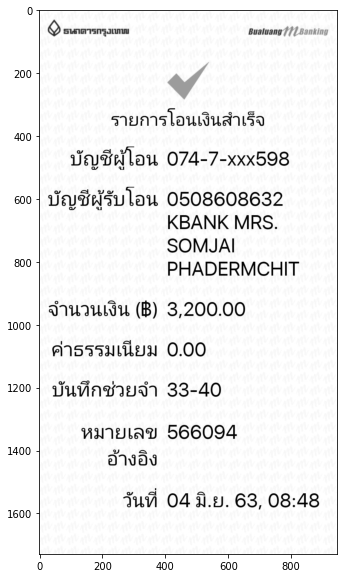

In [2]:
image = cv2.imread("images\\40.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

In [3]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 6')

In [4]:
print(recog_str)

@ ธนชาเตารทรุงเทพเข                                      8แลเพลทย    4     1
รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7->๐๐๕๐98
บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMUAI
PHADERMCHIT
จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง
วันที่ 04 มิ.ย. 63, 08:48



In [5]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 3')

In [6]:
print(recog_str)

(ธนาตารกรุงเทพย        ๒แลเแลทย7 778ลก

รายการโอนเงินสําเร็จ
บัญชีผู้โอน 074-7-๓๐๐598

บัญชีผู้รับโอน 0508608632
KBANK MRS.
SOMIAI
PHADERMCHIT

จํานวนเงิน (8) 3,200.00
ค่าธรรมเนียม 0.00
บันทึกช่วยจํา 33-40
หมายเลข 566094
อ้างอิง

วันที่ 04 มิ.ย. 63, 08:48



In [7]:
image = cv2.imread("images\\1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [8]:
recog_str = image_to_string(image, lang='eng', config='--psm 3')
print(recog_str)

246—0—xxx909
0508608632 KBANK



In [9]:
from pytesseract import Output
image = cv2.imread("images\\40.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
print(image.shape)
image2 = image.copy()
for i in range(n_boxes-1):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    subimg = image2[y-2:y+h+2, x-2:x+w+2]
    if h<image2.shape[0]/20:
        sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
        print(sub_str)


(1729, 947)
อ ธนธาพารทรงเททพเ                                          Buatuang}}.8an

อ ธนธาพารทรงเททพเ                                          Buatuang}}.8an

อ ธนธาพารทรงเททพเ                                          Buatuang}}.8an

อ ธนธาหารทรวเทาชพ

Bualuang } / LBan

รายการใโอนเงินสําเร็จ

รายการใโอนเงินสําเร็จ

บัญชีผ้โอน 074-7-%๕๕598

บัญชีผู้โอน

0 74—/—xxx598

บัญชีผู้รับโอน 0508608632

บัญชีผู้รับโอน

0508608632

KBANK MRS.

KBANK

MRS.

ร0เปป/ป

ร0เปป/ป

PHADERMCHIT

PHADERMCHIT

จํานวนเงิน (8) 3,200.00

จํ้านวนเงิน

(8)

3,200.00

ค่าธรรมเนียม 0.00

ค่าธรรมเนียม

0.00

บันทึกชวยจํา 33-40

บันทึกชวยจํา

33-40

หมายเลข 566094

หมายเลข

566094

อางอง

อางอง

วันที่ 04 มิ.ย. 63, 08:48

วันที่ 04 มิ.ย. 63, 08:48

วันที่ 04 มิ.ย. 63, 08:48

วันทิ

04.

ง.ย.

63,

08:48



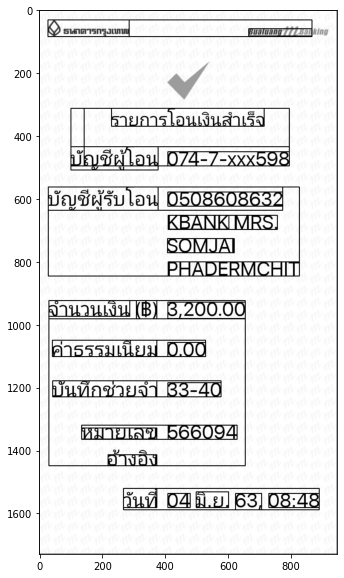

In [10]:

plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

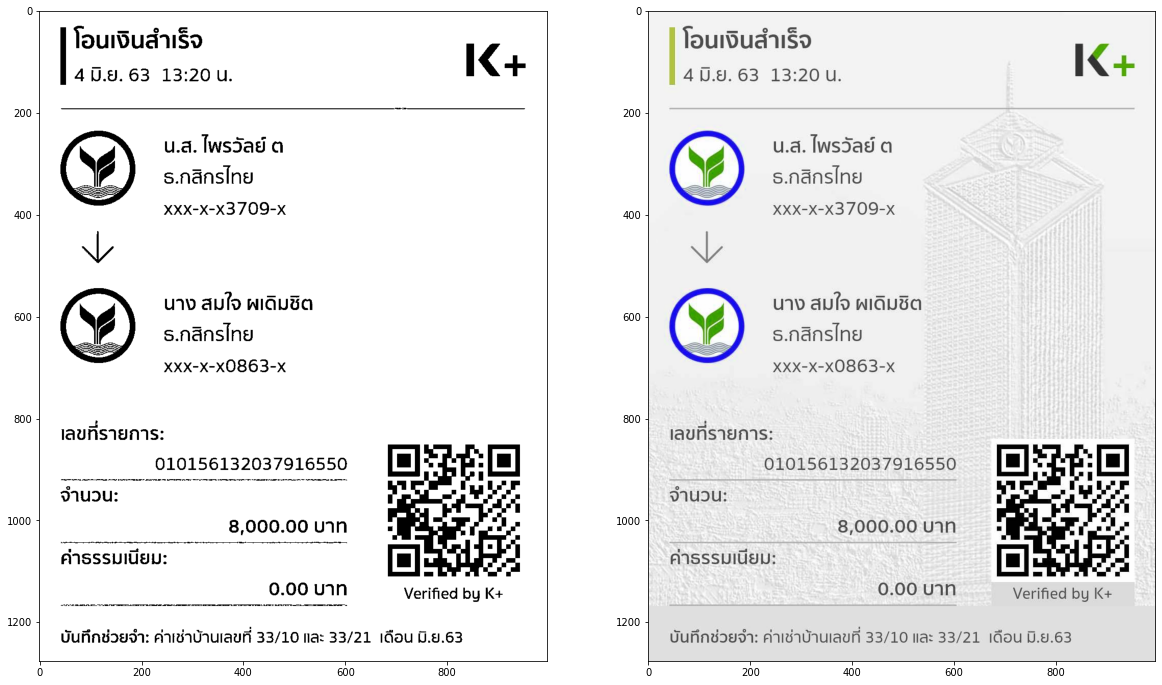

In [11]:
import easyocr
import cv2
image = cv2.imread('images\\10 21.jpg')
image2 = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
a, threshold = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(threshold,cmap='gray')
plt.subplot(122)
plt.imshow(image2)

In [12]:
reader = easyocr.Reader(['th','en'], gpu=False) # need to run only once to load model into memory
result = reader.readtext(threshold)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[61, 25], [331, 25], [331, 85], [61, 85]], 'โอนเงินสำเร็จ', 0.0142329391092062), ([[67, 107], [223, 107], [223, 145], [67, 145]], '4 มิ.ย. 63', 0.12903575599193573), ([[237, 107], [381, 107], [381, 145], [237, 145]], '13:20 น.', 0.5464023947715759), ([[242, 235], [484, 235], [484, 289], [242, 289]], 'น.ส. ไพรวัลย์ ๓', 0.05219877511262894), ([[237, 296], [426, 296], [426, 350], [237, 350]], 'ธ.กสิกรไทย', 0.17309661209583282), ([[241, 369], [489, 369], [489, 407], [241, 407]], 'xxx x-x3709-x', 0.0741160586476326), ([[240, 544], [544, 544], [544, 596], [240, 596]], 'นาง สมใจ ผเดิมชิต', 0.1034662127494812), ([[238, 606], [426, 606], [426, 656], [238, 656]], 'ธ.กสิกรไทย', 0.15126456320285797), ([[241, 676], [491, 676], [491, 716], [241, 716]], 'xxx-x-x0863-x', 0.334881067276001), ([[33, 798], [252, 798], [252, 853], [33, 853]], 'เลขที่รายการ:', 0.1331218034029007), ([[223, 871], [609, 871], [609, 909], [223, 909]], '010156132037916550', 0.5250296592712402), ([[32, 924], [163, 924], [163,

17
โอนเงินสำเร็จ
4 มิ.ย. 63
13:20 น.
น.ส. ไพรวัลย์ ๓
ธ.กสิกรไทย
xxx x-x3709-x
นาง สมใจ ผเดิมชิต
ธ.กสิกรไทย
xxx-x-x0863-x
เลขที่รายการ:
010156132037916550
 จำนวน:
8,000.00 บาท
ค่าธรรมเนียม:
o.00 บาท
 verified by ik+
บันทึกช่วยจำ: ค่าเช่าบ้านเลขที่ 33/10 และ 33/21  เดือน มิ.ย.63


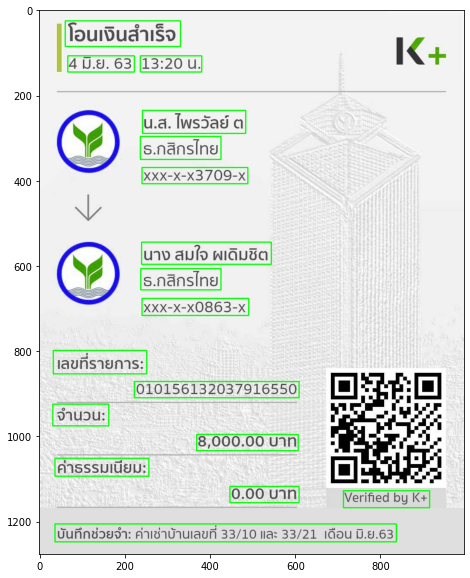

In [18]:
print(len(result))
image3 = image2.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
for entry in result:
    top_left, top_right, bottom_right, bottom_left = entry[0]
    cv2.rectangle(image3, (top_left[0], top_left[1]), (bottom_right[0], bottom_right[1]), (0, 255, 0), 2)
    
    print(entry[1])
#     sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
#     print(sub_str)
#     cv2.putText(image2, entry[1], (top_left[0], top_left[1]), font, 1, (0, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(image3)

In [43]:
# find candidate by coordinate
def find_candidate(result, entry):
    top_left, top_right, bottom_right, bottom_left = entry[0]
    height = bottom_left[1] - top_left[1]
    for entry1 in result:
        top_left1, top_right1, bottom_right1, bottom_left1 = entry1[0]
        # y coordinate should be same or under of label
        if entry == entry1:
            continue
        if (top_left1[1] - bottom_left[1] < 1.5 * height and top_left1[1] - top_left[1] > 0) \
            or (abs(top_left1[1] - top_left[1]) < height/5 and abs(bottom_left1[1] - bottom_left[1]) < height/5):
            return entry1[1]
    return ''

        
amount = ''
fee = ''
for entry in result:
    e_text = entry[1]
    # find amount
    if 'จำนวน' in e_text:
        amount = find_candidate(result, entry)
    if 'ค่าธรรมเนียม' in e_text:
        fee = find_candidate(result, entry)
    
print(amount)
print(fee)

8,000.00 บาท
o.00 บาท
